In [2]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns


In [3]:
IMG_SIZE = (224, 224)
BATCH_SIZE = 32
SEED = 42
DATASET_PATH = "../dataset/raw"

datagen = tf.keras.preprocessing.image.ImageDataGenerator(
    rescale=1./255,
    validation_split=0.30
)

train_data = datagen.flow_from_directory(
    DATASET_PATH,
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    subset='training',
    seed=SEED
)

val_test_data = datagen.flow_from_directory(
    DATASET_PATH,
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    subset='validation',
    seed=SEED
)


Found 8789 images belonging to 8 classes.
Found 3764 images belonging to 8 classes.


In [4]:
import math

val_batches = math.floor(val_test_data.samples * 0.5 / BATCH_SIZE)

val_data = val_test_data
val_data.samples = val_batches * BATCH_SIZE

test_data = val_test_data
test_data.samples = val_test_data.samples - val_data.samples


In [5]:
base_model = tf.keras.applications.MobileNetV2(
    input_shape=(224, 224, 3),
    include_top=False,
    weights='imagenet'
)

base_model.trainable = False


9406464/9406464 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


In [6]:
model = tf.keras.Sequential([
    base_model,
    tf.keras.layers.GlobalAveragePooling2D(),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(train_data.num_classes, activation='softmax')
])


In [7]:
model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

model.summary()


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ mobilenetv2_1.00_224            │ (None, 7, 7, 1280)     │     2,257,984 │
│ (Functional)                    │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d        │ (None, 1280)           │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 1280)           │         5,120 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │       163,968 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 8)              │         1,032 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,428,104 (9.26 MB)

 Trainable params: 167,560 (654.53 KB)

 Non-trainable params: 2,260,544 (8.62 MB)

In [8]:
EPOCHS = 10

history = model.fit(
    train_data,
    validation_data=val_data,
    epochs=EPOCHS
)


Epoch 1/10
275/275 ━━━━━━━━━━━━━━━━━━━━ 118s 418ms/step - accuracy: 0.4855 - loss: 1.4854 - val_accuracy: 0.5922 - val_loss: 0.9972
Epoch 2/10
275/275 ━━━━━━━━━━━━━━━━━━━━ 105s 382ms/step - accuracy: 0.5986 - loss: 1.0078 - val_accuracy: 0.6198 - val_loss: 0.9383
Epoch 3/10
275/275 ━━━━━━━━━━━━━━━━━━━━ 97s 352ms/step - accuracy: 0.6520 - loss: 0.8910 - val_accuracy: 0.6334 - val_loss: 0.9086
Epoch 4/10
275/275 ━━━━━━━━━━━━━━━━━━━━ 171s 624ms/step - accuracy: 0.6827 - loss: 0.8225 - val_accuracy: 0.6307 - val_loss: 0.9139
Epoch 5/10
275/275 ━━━━━━━━━━━━━━━━━━━━ 106s 385ms/step - accuracy: 0.7013 - loss: 0.7697 - val_accuracy: 0.6395 - val_loss: 0.8985
Epoch 6/10
275/275 ━━━━━━━━━━━━━━━━━━━━ 113s 409ms/step - accuracy: 0.7178 - loss: 0.7198 - val_accuracy: 0.6472 - val_loss: 0.8977
Epoch 7/10
275/275 ━━━━━━━━━━━━━━━━━━━━ 121s 440ms/step - accuracy: 0.7427 - loss: 0.6706 - val_accuracy: 0.6504 - val_loss: 0.9041
Epoch 8/10
275/275 ━━━━━━━━━━━━━━━━━━━━ 176s 641ms/step - accuracy: 0.7473 - 

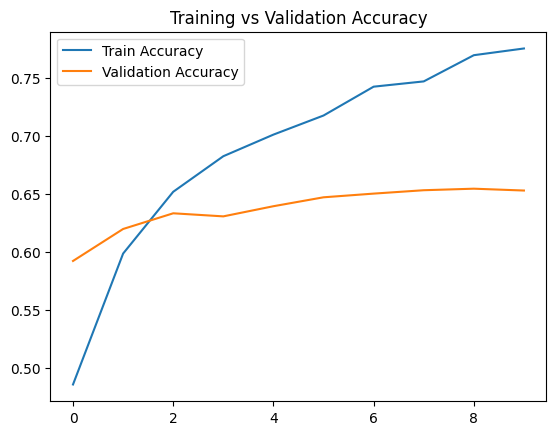

In [9]:
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend()
plt.title("Training vs Validation Accuracy")
plt.show()


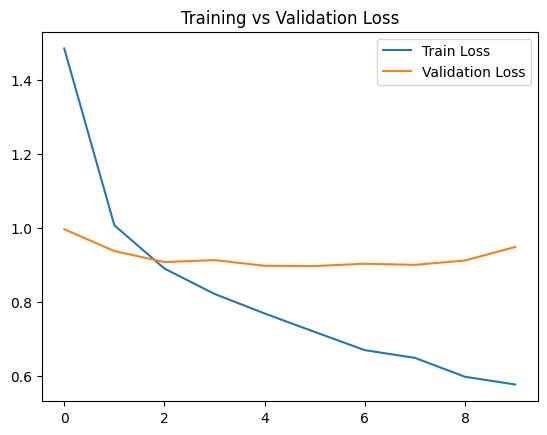

In [10]:
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.title("Training vs Validation Loss")
plt.show()


In [11]:
test_loss, test_acc = model.evaluate(test_data)
test_acc


118/118 ━━━━━━━━━━━━━━━━━━━━ 34s 285ms/step - accuracy: 0.6530 - loss: 0.9493


0.653028666973114

In [13]:

labels = np.unique(y_true)

class_names = list(train_data.class_indices.keys())
used_class_names = [class_names[i] for i in labels]

print(classification_report(
    y_true,
    y_pred,
    labels=labels,
    target_names=used_class_names
))


                   precision    recall  f1-score   support

Atomic Dermatitis       0.11      0.12      0.11       365
           Eczema       0.13      0.15      0.14       468
 Melanocytic Nevi       0.09      0.08      0.08       359
         Melanoma       0.26      0.27      0.26       940
        Psoriasis       0.17      0.16      0.17       588
   Tinea Ringworm       0.13      0.11      0.12       489
  Warts Molluscum       0.15      0.14      0.15       555

         accuracy                           0.16      3764
        macro avg       0.15      0.15      0.15      3764
     weighted avg       0.16      0.16      0.16      3764



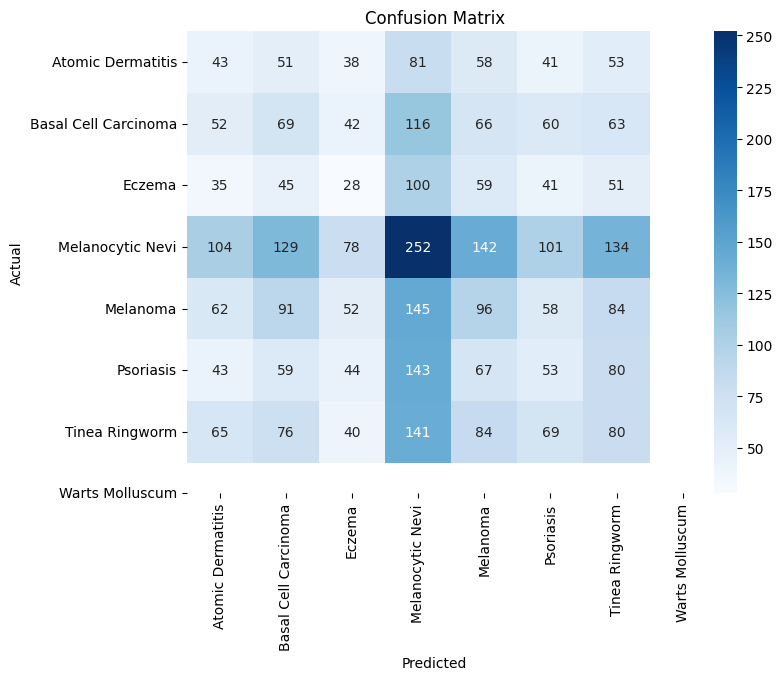

In [14]:
cm = confusion_matrix(y_true, y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d',
            xticklabels=train_data.class_indices.keys(),
            yticklabels=train_data.class_indices.keys(),
            cmap='Blues')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()


In [16]:
import os

os.makedirs("../models", exist_ok=True)


In [17]:
model.save("../models/skin_disease_model.keras")


In [18]:
loaded_model = tf.keras.models.load_model("../models/skin_disease_model.keras")
loaded_model.summary()


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ mobilenetv2_1.00_224            │ (None, 7, 7, 1280)     │     2,257,984 │
│ (Functional)                    │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d        │ (None, 1280)           │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 1280)           │         5,120 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │       163,968 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 8)              │         1,032 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,763,226 (10.54 MB)

 Trainable params: 167,560 (654.53 KB)

 Non-trainable params: 2,260,544 (8.62 MB)

 Optimizer params: 335,122 (1.28 MB)

In [19]:
test_loss, test_accuracy = model.evaluate(test_data)
print("Test Accuracy:", round(test_accuracy * 100, 2), "%")


118/118 ━━━━━━━━━━━━━━━━━━━━ 31s 263ms/step - accuracy: 0.6530 - loss: 0.9493
Test Accuracy: 65.3 %


In [20]:
# Unfreeze top layers for fine-tuning
base_model.trainable = True

for layer in base_model.layers[:-50]:  # freeze lower layers
    layer.trainable = False


In [21]:
model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=1e-5),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)


In [22]:
fine_tune_epochs = 8

history_fine = model.fit(
    train_data,
    validation_data=val_data,
    epochs=fine_tune_epochs
)


Epoch 1/8
275/275 ━━━━━━━━━━━━━━━━━━━━ 181s 630ms/step - accuracy: 0.5283 - loss: 1.3524 - val_accuracy: 0.5696 - val_loss: 1.8033
Epoch 2/8
275/275 ━━━━━━━━━━━━━━━━━━━━ 191s 694ms/step - accuracy: 0.5935 - loss: 1.1108 - val_accuracy: 0.5696 - val_loss: 1.7778
Epoch 3/8
275/275 ━━━━━━━━━━━━━━━━━━━━ 222s 807ms/step - accuracy: 0.6269 - loss: 0.9771 - val_accuracy: 0.5935 - val_loss: 1.4210
Epoch 4/8
275/275 ━━━━━━━━━━━━━━━━━━━━ 713s 3s/step - accuracy: 0.6522 - loss: 0.8974 - val_accuracy: 0.6031 - val_loss: 1.2711
Epoch 5/8
275/275 ━━━━━━━━━━━━━━━━━━━━ 250s 912ms/step - accuracy: 0.6744 - loss: 0.8309 - val_accuracy: 0.6196 - val_loss: 1.1610
Epoch 6/8
275/275 ━━━━━━━━━━━━━━━━━━━━ 175s 637ms/step - accuracy: 0.6956 - loss: 0.7860 - val_accuracy: 0.6376 - val_loss: 1.0427
Epoch 7/8
275/275 ━━━━━━━━━━━━━━━━━━━━ 291s 1s/step - accuracy: 0.7195 - loss: 0.7233 - val_accuracy: 0.6512 - val_loss: 0.9842
Epoch 8/8
275/275 ━━━━━━━━━━━━━━━━━━━━ 293s 1s/step - accuracy: 0.7418 - loss: 0.6656 - v

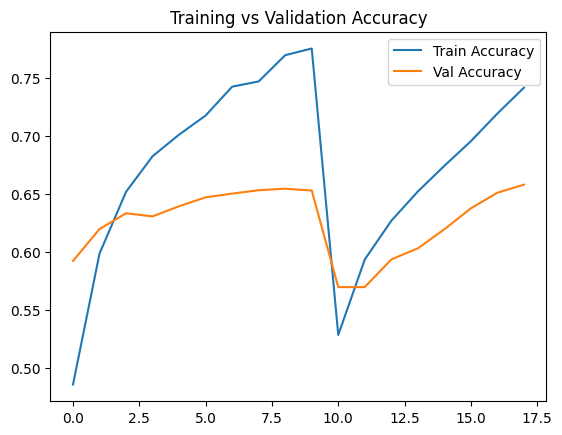

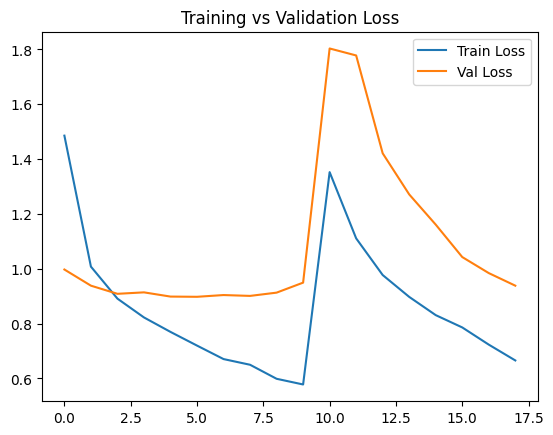

In [23]:
plt.plot(history.history['accuracy'] + history_fine.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'] + history_fine.history['val_accuracy'], label='Val Accuracy')
plt.legend()
plt.title("Training vs Validation Accuracy")
plt.show()

plt.plot(history.history['loss'] + history_fine.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'] + history_fine.history['val_loss'], label='Val Loss')
plt.legend()
plt.title("Training vs Validation Loss")
plt.show()


In [24]:
test_loss, test_accuracy = model.evaluate(test_data)
print("Test Accuracy:", round(test_accuracy * 100, 2), "%")


118/118 ━━━━━━━━━━━━━━━━━━━━ 30s 253ms/step - accuracy: 0.6581 - loss: 0.9383
Test Accuracy: 65.81 %


In [25]:
y_true = test_data.classes
y_pred = np.argmax(model.predict(test_data), axis=1)

labels = np.unique(y_true)
class_names = list(train_data.class_indices.keys())
used_class_names = [class_names[i] for i in labels]

print(classification_report(
    y_true,
    y_pred,
    labels=labels,
    target_names=used_class_names
))


118/118 ━━━━━━━━━━━━━━━━━━━━ 37s 302ms/step
                   precision    recall  f1-score   support

Atomic Dermatitis       0.09      0.11      0.10       365
           Eczema       0.14      0.16      0.15       468
 Melanocytic Nevi       0.10      0.10      0.10       359
         Melanoma       0.26      0.27      0.27       940
        Psoriasis       0.16      0.16      0.16       588
   Tinea Ringworm       0.12      0.09      0.11       489
  Warts Molluscum       0.16      0.15      0.16       555

         accuracy                           0.17      3764
        macro avg       0.15      0.15      0.15      3764
     weighted avg       0.17      0.17      0.17      3764



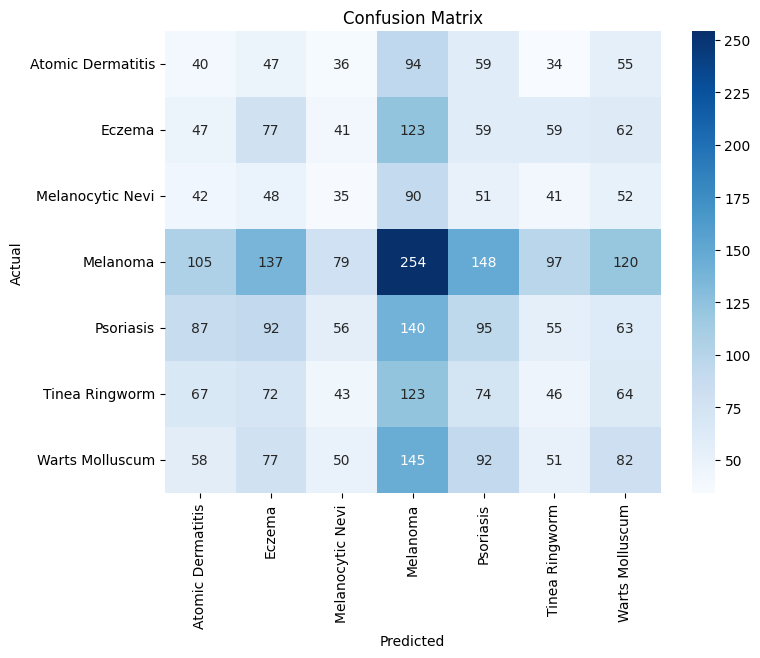

In [26]:
cm = confusion_matrix(y_true, y_pred, labels=labels)

plt.figure(figsize=(8,6))
sns.heatmap(
    cm,
    annot=True,
    fmt='d',
    xticklabels=used_class_names,
    yticklabels=used_class_names,
    cmap='Blues'
)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()


In [ ]:
import os
os.makedirs("../models", exist_ok=True)
model.save("../models/skin_disease_model.keras")
